### 1. Import Dataset

In [88]:
#Importing everything
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

sns.set_palette("pastel")

In [2]:
#load dataset
df = pd.read_csv(os.path.join( "..", "data", "Tele.csv"))

### 2. Explore Dataset

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

***Observations:***

▶ No missing data in the dataset.
<br>
▶ Column names have spaces.
<br>
▶ Some of the columns are indicated as float even it should be numbers.
<br>
▶There are some Categorical variables.

In [9]:
#Dealing with spaces between column names
df.columns = [c.replace(' ', '_') for c in df.columns]

In [10]:
#Check if it worked
columns = df.columns.to_list()
print(columns)

['state', 'account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'churn']


In [11]:
#check number of target variable
df["churn"].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [12]:
#Categorical Variables
print(df["state"].unique())
print(df["area_code"].unique())
print(df["international_plan"].unique())
print(df["voice_mail_plan"].unique())
print(df["customer_service_calls"].unique())

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
[415 408 510]
['no' 'yes']
['yes' 'no']
[1 0 2 3 4 5 7 9 6 8]


In [13]:
#change datatypes
df['total_day_minutes'] = df['total_day_minutes'].astype(int)
df['total_day_charge'] = df['total_day_charge'].astype(int)
df['total_eve_minutes'] = df['total_eve_minutes'].astype(int)
df['total_eve_charge'] = df['total_eve_charge'].astype(int)
df['total_night_minutes'] = df['total_night_minutes'].astype(int)
df['total_night_charge'] = df['total_night_charge'].astype(int)
df['total_intl_minutes'] = df['total_intl_minutes'].astype(int)
df['total_intl_charge'] = df['total_intl_charge'].astype(int)

In [14]:
#check if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   3333 non-null   object
 1   account_length          3333 non-null   int64 
 2   area_code               3333 non-null   int64 
 3   phone_number            3333 non-null   object
 4   international_plan      3333 non-null   object
 5   voice_mail_plan         3333 non-null   object
 6   number_vmail_messages   3333 non-null   int64 
 7   total_day_minutes       3333 non-null   int32 
 8   total_day_calls         3333 non-null   int64 
 9   total_day_charge        3333 non-null   int32 
 10  total_eve_minutes       3333 non-null   int32 
 11  total_eve_calls         3333 non-null   int64 
 12  total_eve_charge        3333 non-null   int32 
 13  total_night_minutes     3333 non-null   int32 
 14  total_night_calls       3333 non-null   int64 
 15  tota

In [15]:
#chcking missing data
df.isna().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [16]:
#checking if there are duplicates by using unique identifier 'phone number'
df['phone_number'].duplicated().sum()

0

### 3. Visualization of each categories

#### 1. Categorical Variables

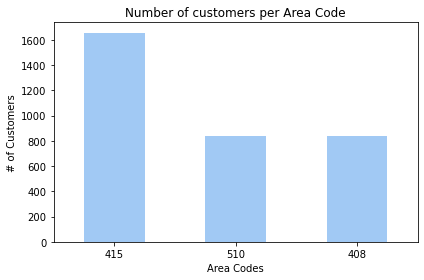

In [17]:
#Distribution of 'area_code'
df['area_code'].value_counts().plot(kind='bar', rot=0)
plt.title('Number of customers per Area Code')
plt.xlabel('Area Codes')
plt.ylabel('# of Customers')
plt.tight_layout()

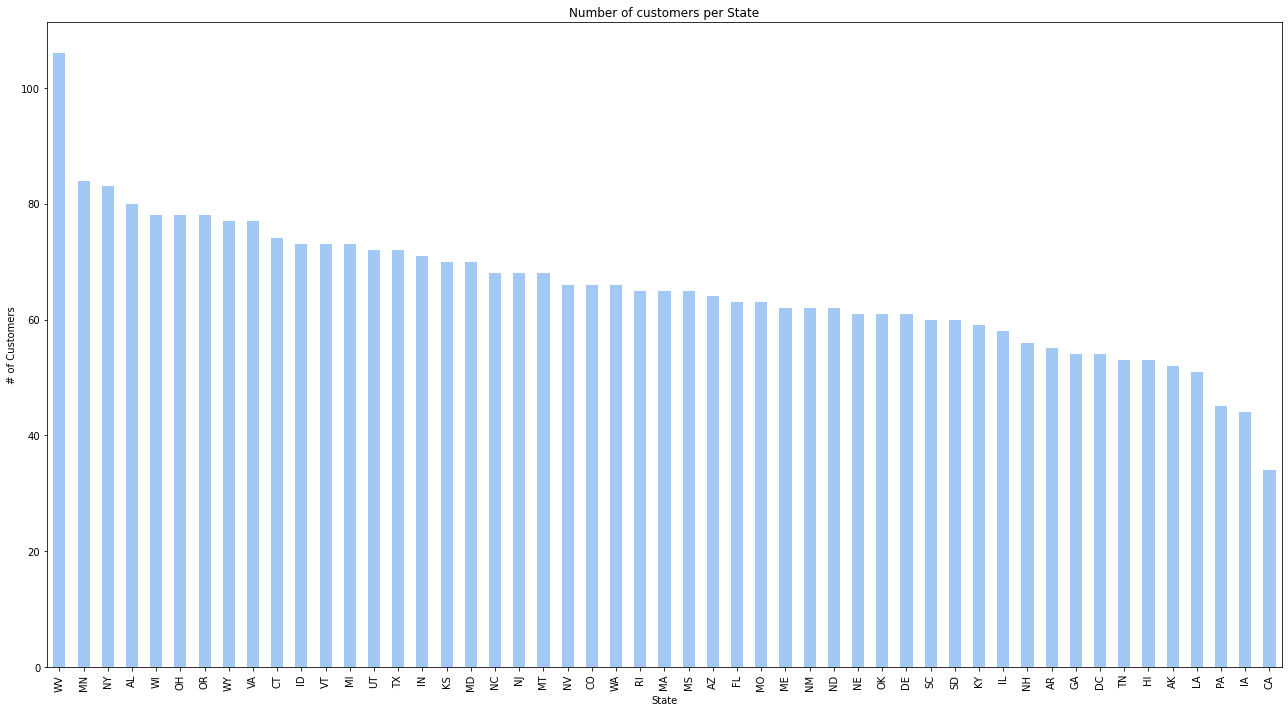

In [18]:
#Distribution of 'state'
df['state'].value_counts().plot(kind='bar', figsize=(18,10))
plt.title('Number of customers per State')
plt.xlabel('State')
plt.ylabel('# of Customers')
plt.tight_layout()

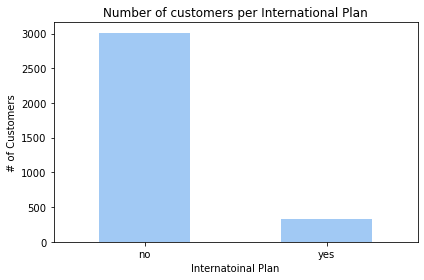

In [19]:
#Distribution of 'internatoinal_plan'
df['international_plan'].value_counts().plot(kind='bar', rot=0)
plt.title('Number of customers per International Plan')
plt.xlabel('Internatoinal Plan')
plt.ylabel('# of Customers')
plt.tight_layout()

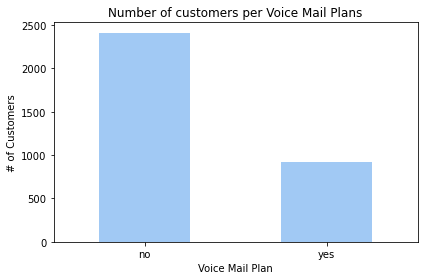

In [20]:
#Distribution of 'voice_mail_plan'
df['voice_mail_plan'].value_counts().plot(kind='bar', rot=0)
plt.title('Number of customers per Voice Mail Plans')
plt.xlabel('Voice Mail Plan')
plt.ylabel('# of Customers')
plt.tight_layout()

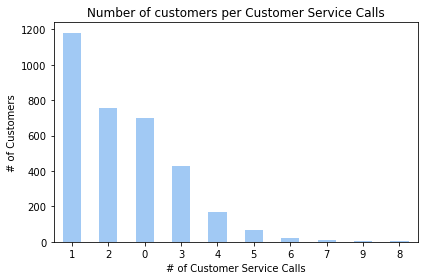

In [21]:
#Distribution of 'customer_service_calls'
df['customer_service_calls'].value_counts().plot(kind='bar', rot=0)
plt.title('Number of customers per Customer Service Calls')
plt.xlabel('# of Customer Service Calls')
plt.ylabel('# of Customers')
plt.tight_layout()

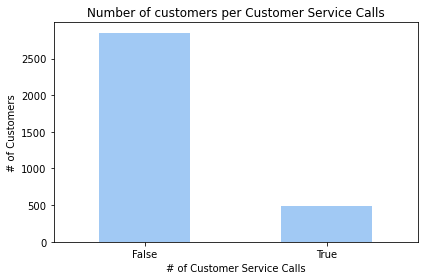

In [22]:
#Distribution of 'churn'
df['churn'].value_counts().plot(kind='bar', rot=0)
plt.title('Number of customers per Customer Service Calls')
plt.xlabel('# of Customer Service Calls')
plt.ylabel('# of Customers')
plt.tight_layout()

#### 2. Numerical Variables

In [23]:
#Making pivot colums for total minutes, calls and charges of dataset
total_minutes = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']
total_calls = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls'] + df['total_intl_calls']
total_charges = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge']

In [24]:
#Adding columns to df(dataset)
df['total_minutes'] = total_minutes
df['total_calls'] = total_calls
df['total_charges'] = total_charges

Text(0.5, 1.0, 'Total Minutes vs Total Charges')

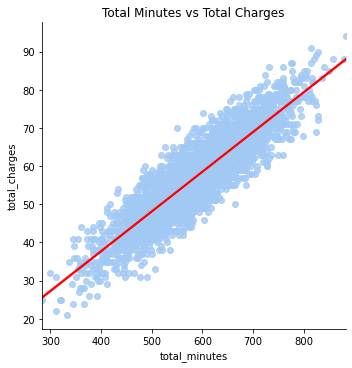

In [25]:
sns.lmplot(data=df, x='total_minutes', y='total_charges', fit_reg=True, line_kws={'color' : 'red'})
#changing color method was obtained from https://stackoverflow.com/questions/35827268/how-to-change-the-line-color-in-seaborn-lmplot/35827498
plt.title('Total Minutes vs Total Charges')

### 4. Visualization of relationship between churn and variables

In [26]:
#changing churn into numbers
df.loc[df.churn=='no', 'churn'] =0
df.loc[df.churn=='yes', 'churn'] =1

In [27]:
rev = df.groupby(['churn'])['total_minutes', 'total_calls', 'total_charges'].mean()
rev

,total_minutes,total_calls,total_charges
churn,,,
False,582.715088,304.912982,56.483509
True,633.457557,306.459627,63.349896


Text(0, 0.5, 'Usage of the phone')

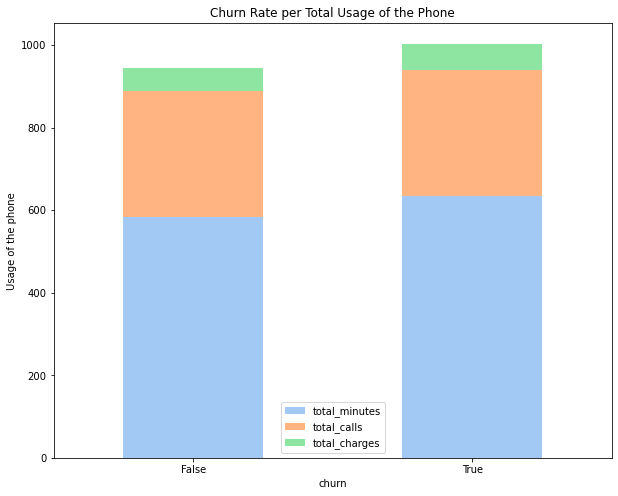

In [28]:
r = rev.plot.bar(stacked=True, figsize=(10,8), rot=0)
plt.title("Churn Rate per Total Usage of the Phone")
plt.ylabel("Usage of the phone")

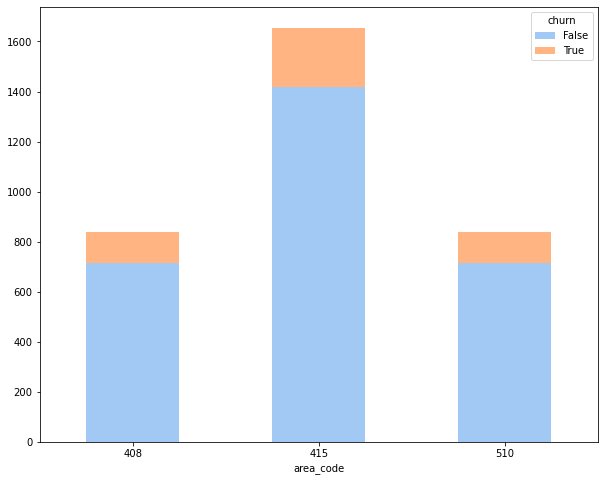

In [29]:
df.groupby(["area_code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(10,8), rot=0)

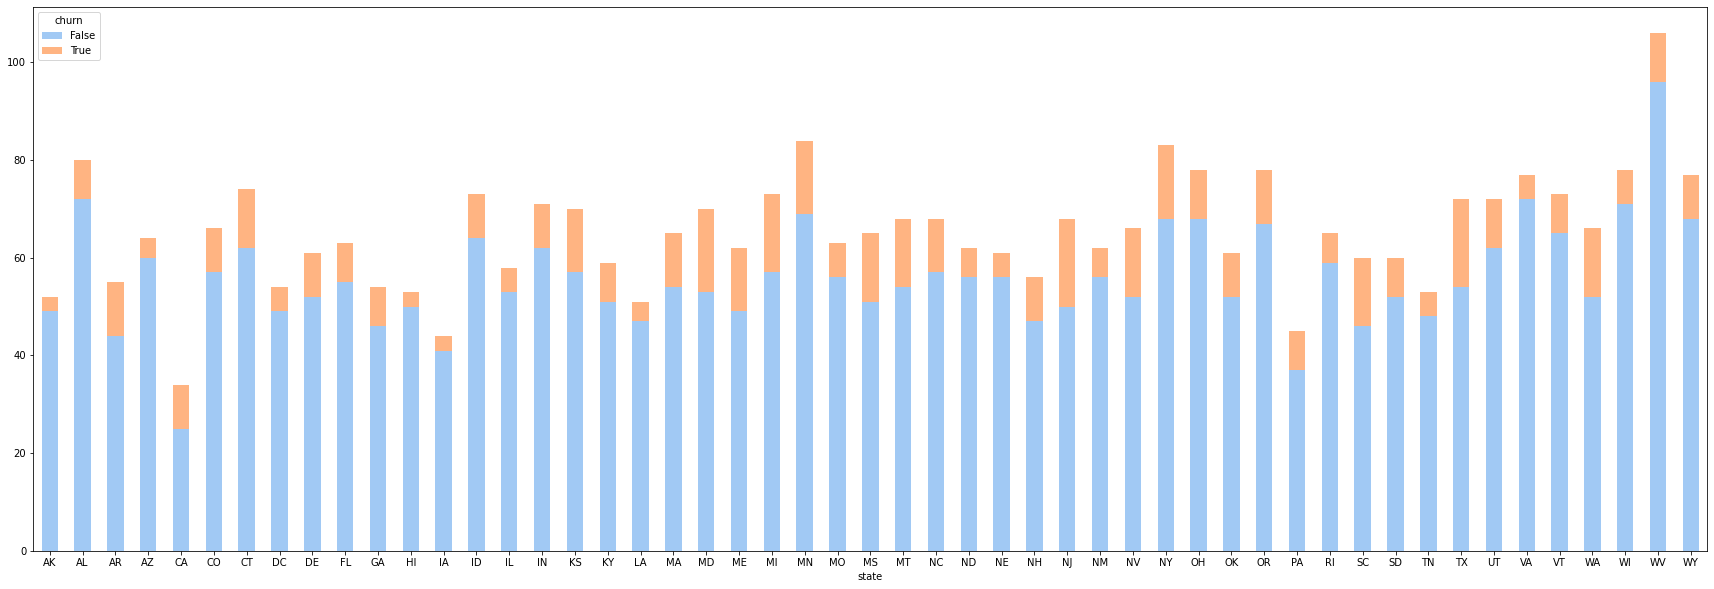

In [30]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10), rot=0)

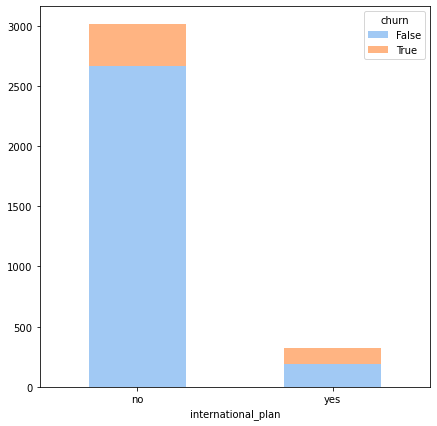

In [31]:
df.groupby(["international_plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(7,7) ,rot=0)

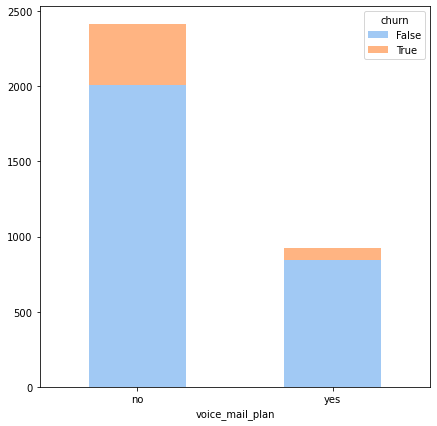

In [32]:
df.groupby(["voice_mail_plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(7,7) ,rot=0)

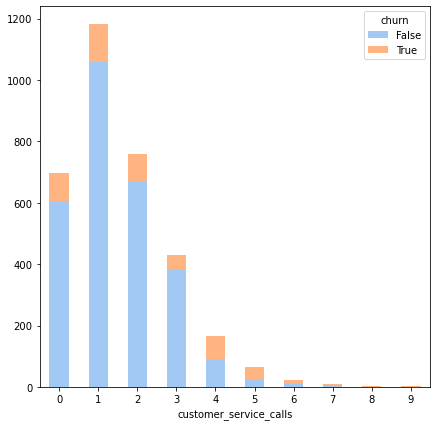

In [33]:
df.groupby(["customer_service_calls", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(7,7) ,rot=0)

In [34]:
#checking before start the test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   3333 non-null   object
 1   account_length          3333 non-null   int64 
 2   area_code               3333 non-null   int64 
 3   phone_number            3333 non-null   object
 4   international_plan      3333 non-null   object
 5   voice_mail_plan         3333 non-null   object
 6   number_vmail_messages   3333 non-null   int64 
 7   total_day_minutes       3333 non-null   int32 
 8   total_day_calls         3333 non-null   int64 
 9   total_day_charge        3333 non-null   int32 
 10  total_eve_minutes       3333 non-null   int32 
 11  total_eve_calls         3333 non-null   int64 
 12  total_eve_charge        3333 non-null   int32 
 13  total_night_minutes     3333 non-null   int32 
 14  total_night_calls       3333 non-null   int64 
 15  tota

In [35]:
#realized area_code was considered as numerical when it was supposed to be a categorical. Changing it back so when I create pd. dummies, it works correctly.
df['area_code'] = df['area_code'].astype(str)

In [36]:
#dropping a column that was an unique identifier.
df.drop(['phone_number'], axis =1, inplace=True)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_minutes,total_calls,total_charges
0,KS,128,415,no,yes,25,265,110,45,197,99,16,244,91,11,10,3,2,1,False,716,303,74
1,OH,107,415,no,yes,26,161,123,27,195,103,16,254,103,11,13,3,3,1,False,623,332,57
2,NJ,137,415,no,no,0,243,114,41,121,110,10,162,104,7,12,5,3,0,False,538,333,61
3,OH,84,408,yes,no,0,299,71,50,61,88,5,196,89,8,6,7,1,2,False,562,255,64
4,OK,75,415,yes,no,0,166,113,28,148,122,12,186,121,8,10,3,2,3,False,510,359,50


In [99]:
#create and set features
X = df.drop(columns= 'churn', axis=1)
y = df['churn']

In [137]:
labelencoder = LabelEncoder()
df['churn'] = labelencoder.fit_transform(df['churn'])

In [138]:
#creating dummies for categorical variables that are in the X
X = pd.get_dummies(X)
X.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,total_minutes,total_calls,total_charges,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_408,area_code_415,area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0.524793,0.490196,0.757143,0.666667,0.762712,0.542700,0.582353,0.533333,0.594086,0.408451,0.6250,0.50,0.15,0.4,0.111111,0.721667,0.497778,0.726027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.438017,0.509804,0.460000,0.745455,0.457627,0.537190,0.605882,0.533333,0.620968,0.492958,0.6250,0.65,0.15,0.6,0.111111,0.566667,0.626667,0.493151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.561983,0.000000,0.694286,0.690909,0.694915,0.333333,0.647059,0.333333,0.373656,0.500000,0.3750,0.60,0.25,0.6,0.000000,0.425000,0.631111,0.547945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.342975,0.000000,0.854286,0.430303,0.847458,0.168044,0.517647,0.166667,0.465054,0.394366,0.4375,0.30,0.35,0.2,0.222222,0.465000,0.284444,0.589041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.305785,0.000000,0.474286,0.684848,0.474576,0.407713,0.717647,0.400000,0.438172,0.619718,0.4375,0.50,0.15,0.4,0.333333,0.378333,0.746667,0.397260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [102]:
#checking the columns
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 76 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   float64
 1   number_vmail_messages   3333 non-null   float64
 2   total_day_minutes       3333 non-null   float64
 3   total_day_calls         3333 non-null   float64
 4   total_day_charge        3333 non-null   float64
 5   total_eve_minutes       3333 non-null   float64
 6   total_eve_calls         3333 non-null   float64
 7   total_eve_charge        3333 non-null   float64
 8   total_night_minutes     3333 non-null   float64
 9   total_night_calls       3333 non-null   float64
 10  total_night_charge      3333 non-null   float64
 11  total_intl_minutes      3333 non-null   float64
 12  total_intl_calls        3333 non-null   float64
 13  total_intl_charge       3333 non-null   float64
 14  customer_service_calls  3333 non-null   